In [48]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [49]:
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [50]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [51]:
penguin_data = penguins[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [52]:
scaled_penguin_data

# Expand this dataset to 10,000 by adding noise to the points
# First, let's drop rows with NaN values to avoid the ValueError we saw in cell 6
cleaned_penguin_data = scaled_penguin_data[~np.isnan(scaled_penguin_data).any(axis=1)]

# Get the number of samples in the cleaned dataset
n_samples = cleaned_penguin_data.shape[0]

# Calculate how many copies we need to reach approximately 10,000 samples
n_copies = 10000 // n_samples

# Create expanded dataset by repeating the data and adding small random noise
expanded_data = np.vstack([
    cleaned_penguin_data + np.random.normal(0, 0.15, cleaned_penguin_data.shape) 
    for _ in range(n_copies)
])


print(f"Original data shape: {cleaned_penguin_data.shape}")
print(f"Expanded data shape: {expanded_data.shape}")

# Use expanded_data for further processing
scaled_penguin_data = expanded_data


Original data shape: (342, 4)
Expanded data shape: (9918, 4)


In [53]:

import umap
reducer = umap.UMAP()

embedding = reducer.fit_transform(scaled_penguin_data)


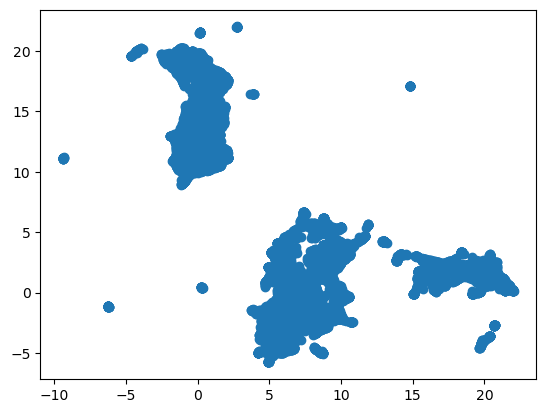

In [54]:
embedding
plt.scatter(embedding[:, 0], embedding[:, 1])

/var/folders/ps/x7v31pds3gn4t11djwg0t03h0000gp/T/ipykernel_19688/4212230916.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


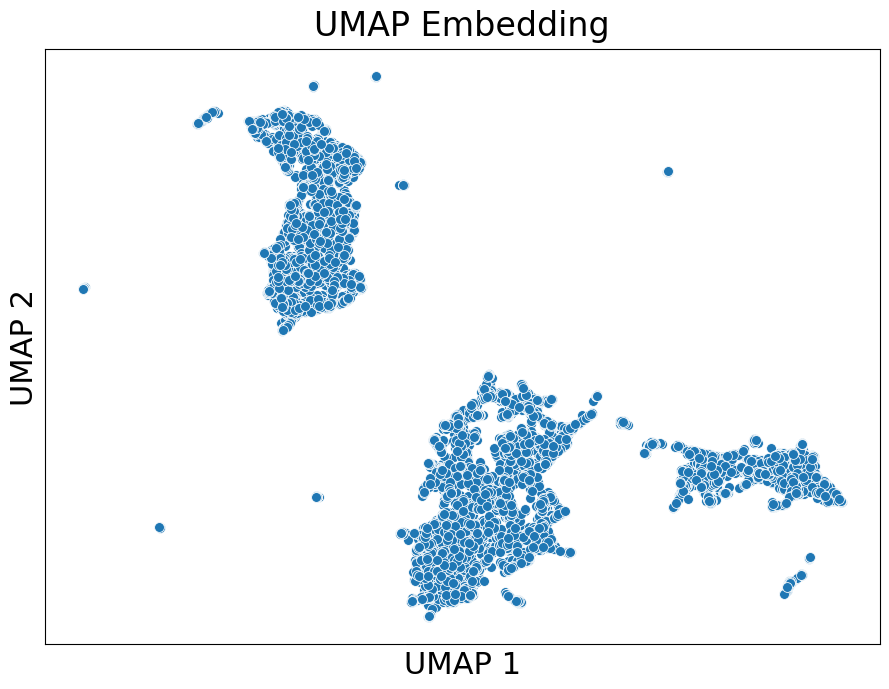

In [68]:
# plot seaborn scatterplot with white background and no grids
plt.figure(figsize=(9, 7), facecolor="white")

# Create the scatter plot
sns.scatterplot(
    x=embedding[:, 0], 
    y=embedding[:, 1], 
    palette="Set2",
    s=50  # Optionally increase point size
)

# Increase font sizes
plt.xlabel("UMAP 1", fontsize=22)
plt.ylabel("UMAP 2", fontsize=22)
plt.title("UMAP Embedding", fontsize=24, pad=10)

# Remove ticks
plt.xticks([])
plt.yticks([])


# Adjust layout to prevent text cutoff
plt.tight_layout()

plt.show()

/var/folders/ps/x7v31pds3gn4t11djwg0t03h0000gp/T/ipykernel_19688/2842542905.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], c=scaled_penguin_data[:, i],
/var/folders/ps/x7v31pds3gn4t11djwg0t03h0000gp/T/ipykernel_19688/2842542905.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], c=scaled_penguin_data[:, i],


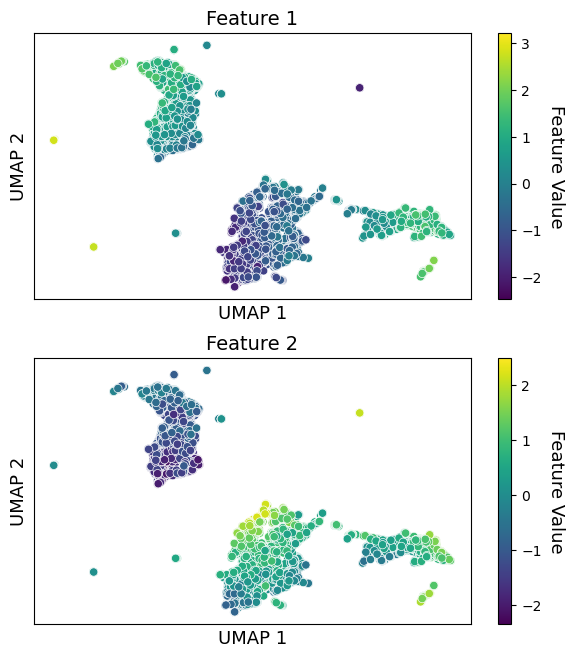

In [67]:
# Create a 2x2 grid of subplots to show all 4 features
fig, axs = plt.subplots(2, 1, figsize=(6, 7))
fig.set_facecolor('white')

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Feature names for titles
feature_names = ["Feature 1", "Feature 2", "Feature 3", "Feature 4"]

# Plot each feature in a separate subplot
for i in range(2):
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], c=scaled_penguin_data[:, i], 
                   ax=axs[i], palette="viridis")
    axs[i].set_xlabel("UMAP 1", fontsize=13)
    axs[i].set_ylabel("UMAP 2", fontsize=13)
    axs[i].set_title(f"{feature_names[i]}", fontsize=14)
    # Remove axis ticks and numbers
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    # Add a viridis colorbar on the rhs of the plot
    cbar = axs[i].figure.colorbar(axs[i].collections[0], ax=axs[i], location="right")
    cbar.ax.set_ylabel("Feature Value", rotation=-90, va="bottom", fontsize=13)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)